---
# **MPA-MLF - Miniproject**

---
Kerbous Chadène and Madec Sacha


**Imports**

In [1]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN
import zipfile
import io



Import the file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data_prepared_final(1).zip to Data_prepared_final(1).zip


In [3]:
zip_file_name = "Data_prepared_final(1).zip"
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("data")

In [4]:
cr = csv.reader(open('data/Data_prepared_final.csv',"r"),delimiter=",")

In [5]:
with open('data/Data_prepared_final.csv', "r") as file:
    cr = csv.reader(file, delimiter=",")
    columns = next(cr)
    data_rows = []
    for row in cr:
        data_rows.append(row)

data = pd.DataFrame(data_rows, columns=columns)
print(data.head())

       time [s] cfo_meas       cfo_demod       gain_imb          iq_imb  \
0  0  45181.524     -414  -421.076324463  0.07609659433  -46.9875984192   
1  1  45182.129     -414  -423.571685791  0.06987947971  -47.8526268005   
2  2   45182.55     -414  -421.033935547  0.06146619469  -48.9686965942   
3  3  45182.971     -414  -420.103546143  0.07883564383  -46.7569732666   
4  4  45183.551     -432  -420.781097412  0.06605253369  -47.0482177734   

           or_off       quadr_err         ph_err        mag_err            evm  
0  -27.2196311951   0.10436187685  1.12977778912  0.44029945135  2.05993533134  
1   -26.934967041   0.05315765366   1.0500099659  0.43124049902  1.81505250931  
2  -27.1307220459  -0.04591253027  0.98947328329  0.44778966904  1.76205265522  
3   -27.005317688   0.08158319443    1.085090518  0.44347578287  1.89420354366  
4  -27.3585205078    0.0819195807   1.0237005949   0.4652249217  1.80584132671  


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0              19200 non-null  object
 1   time [s]   19200 non-null  object
 2   cfo_meas   19200 non-null  object
 3   cfo_demod  19200 non-null  object
 4   gain_imb   19200 non-null  object
 5   iq_imb     19200 non-null  object
 6   or_off     19200 non-null  object
 7   quadr_err  19200 non-null  object
 8   ph_err     19200 non-null  object
 9   mag_err    19200 non-null  object
 10  evm        19200 non-null  object
dtypes: object(11)
memory usage: 1.6+ MB
None


In [8]:
print(data.describe())

                time [s] cfo_meas      cfo_demod       gain_imb  \
count   19200      19200    19200          19200          19200   
unique  19200      19196      113          19191          17819   
top         0  53826.175     -342  605.417236328  0.07472212613   
freq        1          2      682              2              4   

                iq_imb          or_off      quadr_err         ph_err  \
count            19200           19200          19200          19200   
unique           19142           19137          19118          19146   
top     -31.6421756744  -27.1608085632  2.10921025276  1.10968756676   
freq                 3               2              2              2   

              mag_err            evm  
count           19200          19200  
unique          19186          19163  
top     2.25835800171  4.35689496994  
freq                2              2  


# Data Processing

Since the units of the features are differents and the standard deviation is much higher in
certain cases than in others We should do a standardization

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Methods

## **K-means**

### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

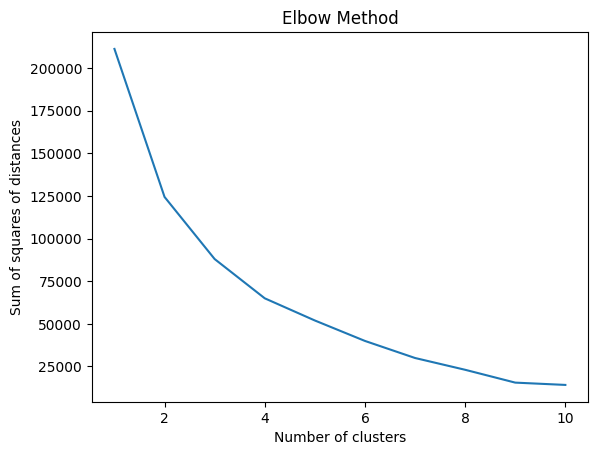

In [10]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    elbow.append(kmeans.inertia_)

plt.plot(range(1, 11), elbow)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares of distances')
plt.show()

It's hard to see the optimal number of clusters for k-means clustering. The elbow of the curve is not easy to identified.

### Silhouette Analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

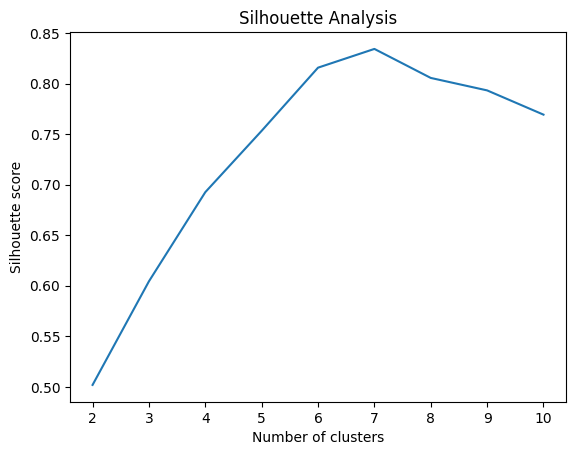

In [13]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

With this method, we can see that we have a first indication of the number of of wireless transmitters.

## **DBSCAN**

When we use the scalled data, there are 8 clusters whereas without the data process the dbscan does not recognize any cluster.

In [ ]:
eps = 1
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(data_scaled)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", num_clusters)
num_noise_points = np.sum(cluster_labels == -1)
print("Number of noise points:", num_noise_points)

Number of clusters: 8
Number of noise points: 59


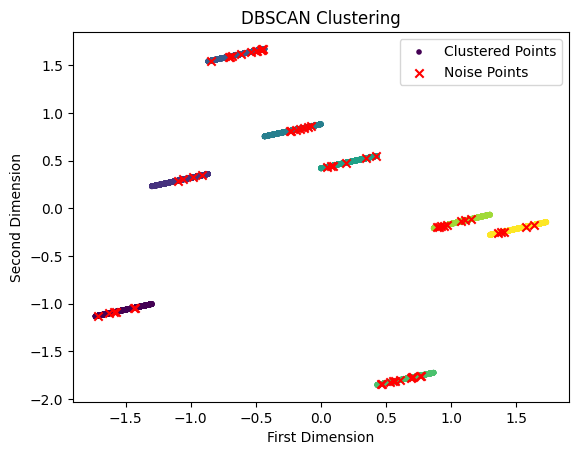

In [ ]:
clustered_data = data_scaled[cluster_labels != -1]
noise_points = data_scaled[cluster_labels == -1]
plt.scatter(clustered_data[:, 0], clustered_data[:, 1], c=cluster_labels[cluster_labels != -1], cmap='viridis', marker='.', label='Clustered Points')
plt.scatter(noise_points[:, 0], noise_points[:, 1], color='red', marker='x', label='Noise Points')

plt.title('DBSCAN Clustering')
plt.legend()
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.show()